<a href="https://colab.research.google.com/github/sabinagio/what-s-the-matter/blob/main/tweets_and_user_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Tweets & Users

## Table of contents
1. [Tweet metrics analysis](#tweet-analysis-1)
2. [User analysis](#user-analysis)
3. [Tweet contents analysis](#tweet-analysis-2)





In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
# Change environment to project environment
import os
os.environ['CONDA_DEFAULT_ENV'] = "twitter_nlp"
print (os.environ['CONDA_DEFAULT_ENV'])

twitter_nlp


In [24]:
kernel

NameError: name 'kernel' is not defined

In [25]:
# Import data manipulation libraries
import pandas as pd
import numpy as np
from math import floor

# Import plotting libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
tweets = pd.read_csv("data/tweets_data_1.csv")
tweet_count = tweets.shape[0]

users = pd.read_csv("data/users_data_1.csv")
user_count = users.shape[0]

## 1. Tweet metrics analysis <a name="tweet-analysis-1"></a>


In [ ]:
tweets.head()

,possibly_sensitive,created_at,entities,context_annotations,retweet_count,reply_count,like_count,quote_count,id,referenced_tweets,conversation_id,in_reply_to_user_id,author_id,source,text,reply_settings,attachments,geo,withheld
0,False,2022-08-27T07:28:07.000Z,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",NaN,77.0,0.0,0.0,0.0,1.563428e+18,"[{'type': 'retweeted', 'id': '1563426879419580...",1.563428e+18,NaN,1.419257e+08,Twitter for Android,"RT @firstladyship: My People, our Kaduna rally...",everyone,NaN,NaN,NaN
1,False,2022-08-27T07:28:07.000Z,"{'urls': [{'start': 64, 'end': 87, 'url': 'htt...",NaN,0.0,0.0,0.0,0.0,1.563428e+18,NaN,1.563428e+18,NaN,1.309758e+18,Twitter for iPhone,"“Anxiety weighs down the heart, but a kind wor...",everyone,NaN,NaN,NaN
2,False,2022-08-27T07:28:07.000Z,NaN,NaN,0.0,0.0,0.0,0.0,1.563428e+18,NaN,1.563428e+18,NaN,5.576973e+08,Twitter for iPhone,This GIGGO app dey stress my life.,everyone,NaN,NaN,NaN
3,False,2022-08-27T07:28:07.000Z,"{'mentions': [{'start': 3, 'end': 15, 'usernam...","[{'domain': {'id': '10', 'name': 'Person', 'de...",16170.0,0.0,0.0,0.0,1.563428e+18,"[{'type': 'retweeted', 'id': '1563224720085921...",1.563428e+18,NaN,3.238093e+09,Twitter Web App,RT @Jack_Petocz: Ron DeSantis just removed 4 d...,everyone,NaN,NaN,NaN
4,False,2022-08-27T07:28:07.000Z,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",NaN,1.0,0.0,0.0,0.0,1.563428e+18,"[{'type': 'retweeted', 'id': '1563427342617169...",1.563428e+18,NaN,1.457998e+18,Twitter for Android,RT @martinezeunicec: Having therefore these pr...,everyone,NaN,NaN,NaN


In [ ]:
attachments_count = tweets.attachments.isna().value_counts()[False]
attachments_percent = round(attachments_count * 100 / tweet_count, 2)
print("{} (or {}%) of {} tweets have attachments.".format(attachments_count, attachments_percent, tweet_count))

1080 (or 10.79%) of 10010 tweets have attachments.


> “Beginning today you may notice a new boolean field in API responses & streams containing tweets: “possibly_sensitive”. This new field will only surface when a tweet contains a link (or a picture). The meaning of the field doesn’t pertain to the tweet content itself, but instead it is an indicator that the URL contained in the tweet may contain content or media identified as sensitive content.

In [ ]:
sensitive_count = tweet_count - tweets.possibly_sensitive.isna().value_counts()[False]
sensitive_percent = round(sensitive_count * 100 / tweet_count, 2)
print("{} (or {}%) of {} tweets have pictures/links that are potentially sensitive.".format(sensitive_count, sensitive_percent, tweet_count))

0 (or 0.0%) of 10010 tweets have pictures/links that are potentially sensitive.


In [ ]:
geo_count = tweets.geo.value_counts().sum() 
geo_percent = round(geo_count * 100 / tweet_count, 2)
print("We have geographical data for only {} (or {}%) of {} tweets.".format(geo_count, geo_percent, tweet_count))

We have geographical data for only 57 (or 0.57%) of 10010 tweets.


In [ ]:
withheld_count = tweets.withheld.value_counts().sum() 
withheld_percent = round(withheld_count * 100 / tweet_count, 2)
print("We have withheld data for only {} (or {}%) of {} tweets.".format(withheld_count, withheld_percent, tweet_count))

We have withheld data for only 1 (or 0.01%) of 10010 tweets.


In [ ]:
tweets[tweets.withheld.isna() == False]

,possibly_sensitive,created_at,entities,context_annotations,retweet_count,reply_count,like_count,quote_count,id,referenced_tweets,conversation_id,in_reply_to_user_id,author_id,source,text,reply_settings,attachments,geo,withheld
8573,False,2022-08-27T07:10:46.000Z,"{'mentions': [{'start': 3, 'end': 18, 'usernam...",NaN,11.0,0.0,0.0,0.0,1.563424e+18,"[{'type': 'retweeted', 'id': '1563335434033188...",1.563424e+18,NaN,200470479.0,Twitter for iPhone,RT @carin__fischer: So worried again about Pak...,everyone,NaN,NaN,"{'copyright': False, 'country_codes': ['IN']}"


In [ ]:
# Plot the remaining numerical & categorical data
to_plot = ["created_at", "retweet_count", "reply_count", "like_count", "quote_count", "source", "reply_settings"]

fig = make_subplots(rows=floor(len(to_plot) / 2) + 1, cols=2)

for i, x in enumerate(to_plot):
  trace = go.Histogram(x=tweets[x], name=x.replace("_", " ").title())
  row = floor(i / 2) + 1
  col = i % 2 + 1
  fig.append_trace(trace, row, col)

fig.show()

We notice that the 10,000 tweets were:
- created in the span of roughly 30 minutes, suggesting that we need to create many more requests to the API in order to capture daily/weekly data
- mostly allowing anyone to reply
- can be generated by bots, as shown by the `Source` data

We also notice that the preferred way of interacting with a tweet is through retweeting, followed by liking, then replying, and quoting. A better way to visualize this is to use ridgeline plots:

In [ ]:
to_plot = ["retweet_count", "reply_count", "like_count", "quote_count"]
metrics_df = tweets[to_plot]

# Extract the min-max values across the dataframe
x_min = metrics_df.min().min()
x_max = metrics_df.max().max()

# Create dataframe with the counts
metrics_count = pd.DataFrame()
for metric in to_plot:
  metrics_count[metric] = tweets[metric].value_counts()
  # Min-max normalize the data for plotting
  metrics_count[metric] = (metrics_count[metric] - metrics_count[metric].min()) / (metrics_count[metric].max() - metrics_count[metric].min())

In [ ]:
metrics_count

,retweet_count,reply_count,like_count,quote_count
0.0,1.000000,1.000000,1.000000,1.000000
1.0,0.108011,0.077585,0.061441,0.005234
2.0,0.049171,0.007519,0.018045,0.000604
3.0,0.035912,0.001852,0.007639,0.000201
4.0,0.027901,0.000436,0.002878,NaN
...,...,...,...,...
793.0,0.000000,NaN,NaN,NaN
1743.0,0.000000,NaN,NaN,NaN
2309.0,0.000000,NaN,NaN,NaN
5369.0,0.000000,NaN,NaN,NaN


In [ ]:
# Plot ridge lines to compare the 4 key metrics
fig = go.Figure()

for index, metric in enumerate(to_plot):
  metric_series = metrics_count[metrics_count[metric].isna() == False][metric]
  
  # Establish the background for each graph
  fig.add_trace(go.Scatter(
                          x=[x_min, x_max],
                          y=np.full(2, len(to_plot)-index),
                          mode='lines',
                          line_color='white',
                          name=""))
  
  # Add the graphs
  fig.add_trace(go.Scatter(
                          x=metrics_count.index,
                          y=metric_series + (len(to_plot)-index) + 0.4,
                          fill='tonexty',
                          name=metric))
  
  fig.add_annotation(
                      x=x_min,
                      y=len(to_plot)-index,
                      text=metric,
                      showarrow=False,
                      yshift=10)
fig.show()

In [ ]:
## Temporarily giving up on implementing ridge lines as they're too time consuming to correctly implement

Further questions:
1. How correlated are each type of count for a tweet?
2. What is the correlation between the time an account was created and tweet success?
3. What is the correlation between having a verified account and popularity?

## 2. User analysis <a name="user-analysis"></a>

In [ ]:
users.head()

,followers_count,following_count,tweet_count,listed_count,username,id,description,verified,name,created_at
0,372,451,97501,109,Antonucci1625,141925744,Awaking the consciousness of my people,False,Anthony nucci,2010-05-09T12:28:54.000Z
1,91,129,16630,0,chinazaissababe,1309757846335225856,WYSIWYG,False,Nope🫤,2020-09-26T07:33:14.000Z
2,3362,2338,30043,5,TheJessOdey,557697314,A phenomenal woman 👸🏽 || 👻: meet.jess ✨🌹 UI/UX...,False,Mofe🍒,2012-04-19T13:06:15.000Z
3,7234,7844,42285,6,NedraEldridge,3238093166,Hard-Wired Pragmatic. An American Black Woman ...,False,Nedra Eldridge,2015-06-06T17:12:28.000Z
4,97,41,48807,0,BartoloTryzia,1457998353946406913,💫⚡⚡💫,False,⚡💫Tryzia💫⚡,2021-11-09T09:08:23.000Z


In [ ]:
# Check how many users are verified
verified_u = users[users["verified"] == True]
verified_u_percent = round(100 * verified_u.shape[0] / users.shape[0], 2)

print("{}% of the users we collected data from are verified.".format(verified_u_percent))

3.95% of the users we collected data from are verified.


In [ ]:
to_plot = ["followers_count", "following_count", "tweet_count", "listed_count", "created_at"]

fig = make_subplots(rows=floor(len(to_plot) / 2) + 1, cols=2)

for i, x in enumerate(to_plot):
  trace = go.Histogram(x=users[x], name=x.replace("_", " ").title())
  row = floor(i / 2) + 1
  col = i % 2 + 1
  fig.append_trace(trace, row, col)

fig.show()

We notice that all distributions are exponential & very steep, except for the user joining date, which is more even across years. We'll therefore have a look at outliers using box plots:

In [ ]:
fig = make_subplots(rows=floor(len(to_plot) / 2) + 1, cols=2)

for i, x in enumerate(to_plot):
  trace = go.Box(x=users[x], name=x.replace("_", " ").title())
  row = floor(i / 2) + 1
  col = i % 2 + 1
  fig.append_trace(trace, row, col)

fig.show()

Further questions:
1. Is there any correlation between the time an account was created and its popularity & verified status?
2. Are more popular accounts signed up in more lists?
3. Do popular accounts follow more or less people than the average user?
4. Do popular accounts post more than the average user?


## 3. Tweet contents analysis <a name="tweet-analysis-2"></a>

We'll try to get a bird's eye view on the most common words in our dataset:

In [ ]:
def birds_eye(text_series):
  fig = plt.figure(figsize=(10, 10))

  # Extract all of the tweets into one string
  text=str(list(text_series))

  # Create the wordcloud object
  wordcloud = WordCloud(width=1000, height=1000, margin=0).generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

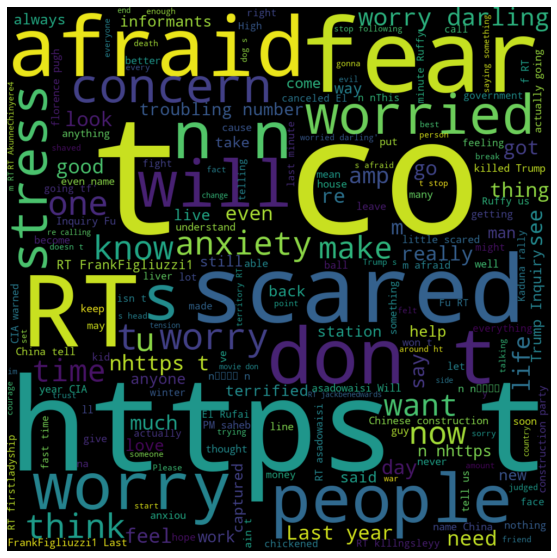

In [ ]:
birds_eye(tweets.text)

We notice we have plenty of words that do not add value to our analysis, for example:
- `RT`: Retweet
- `https`: likely coming from URLs which we'll clean
- `s`, `t`: likely coming from word contractions such as "don't" or "it's"

It would be interesting to explore further in what context `co` is used, as it's not as easy to explain its presence.

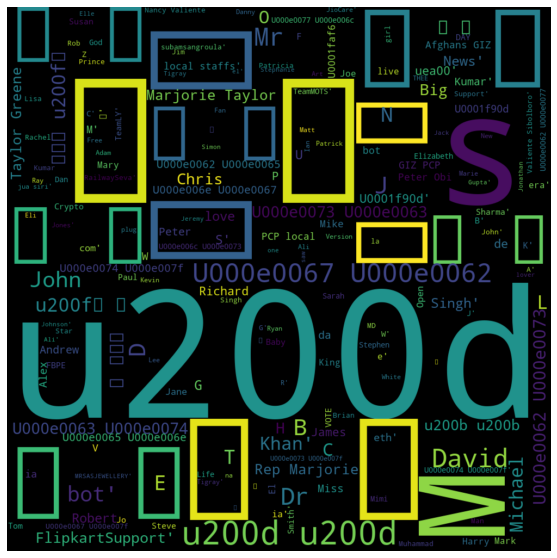

In [ ]:
# Also run a bird's eye on the users dataset
birds_eye(users.name)

We notice that plenty of characters haven't been rendered as they're likely emojis and that we have a lot of ZWJs in addition (`u200d`):

> Zero Width Joiner (ZWJ) is a Unicode character that joins two or more other characters together in sequence to create a new emoji.

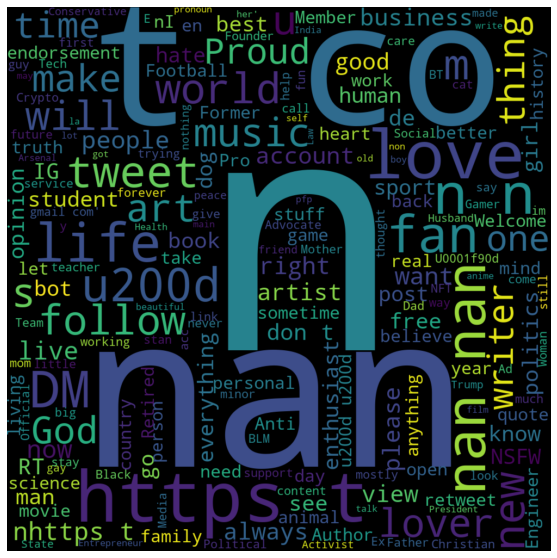

In [ ]:
birds_eye(users.description)

Further questions:
1. What groups of 2-3 words are most prevalent in both datasets?
2. How does the word cloud change after data preprocessing?